# Initializing and Referencing needed Libraries

In [107]:
# import Libraries
from IPython.display import clear_output

from io import StringIO
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries

from sklearn.preprocessing  import LabelEncoder()
from sklearn.preprocessing  import OneHotEncoder()
from sklearn.preprocessing  import StandardScaler()
from sklearn.linear_model import LinearRegression()

from sklearn.model_selection import StratifiedKFold


In [108]:
# Loading Data from URL

url='https://raw.githubusercontent.com/saqibmujtaba/Machine-Learning/DataFiles/50_Startups.csv'
s=requests.get(url).text

dataset=pd.read_csv(StringIO(s))

In [109]:
# Size of data

print(dataset.shape)

(50, 5)


In [110]:
# Variables variation - Qualitative and Quantitative 
print(dataset.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [111]:
dataset.sample(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
26,75328.87,144135.98,134050.07,Florida,105733.54
20,76253.86,113867.30,298664.47,California,118474.03


# Clearly , we have to do Label Encoding on the State column as its a categorical variable.

In [119]:
# Co-relation between different varaibles.

pd.set_option('display.width',100)
pd.set_option('precision',3)
corr = dataset.corr(method='pearson', min_periods=1)


dataset.corr(method='pearson', min_periods=1)


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000,0.242,0.724,0.973
Administration,0.242,1.000,-0.032,0.201
Marketing Spend,0.724,-0.032,1.000,0.748
Profit,0.973,0.201,0.748,1.000


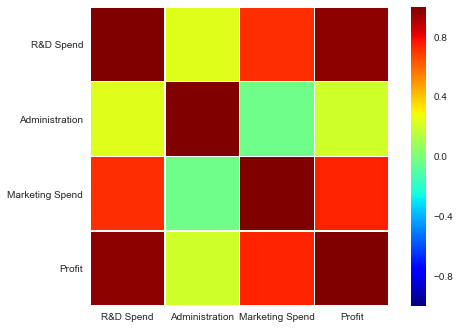

In [147]:
# Visualize co-relation by creating Co-relational Matrix
sns.heatmap(corr, cmap='jet',vmin=-1,vmax=1,center=0,square=True, linewidths=.5, )
plt.show()

#cmap = Paired, Rainbow, jet, Greens, Blues, copper, seismic
# Jet is used mstly as it is having a good variation of color sampling

# Preprocessing 

In [155]:
X = dataset.ix[:, dataset.columns != 'Profit']
print X

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo